импорты

In [1]:
import os
import numpy as np
from natsort import natsorted
import matplotlib
import matplotlib.pyplot as plt
import re
import pandas as pd
from scipy import signal

константы

In [2]:
# 153.8336486816406250 884.2712384333286764    измеряемый диапазон. 0-2136 диапазон данных
start_nm = 400  # нм
end_nm = 700  # нм

x = pd.read_excel("x points nm.xlsx")
x = np.array(x["nm"].values[1 : len(x) - 1])


def nm_to_x(nm):
    return xint.index(nm) + 1


def x_to_nm(index):
    return x[index]


# номера точек в массиве по координате х
for i in range(len(x)):
    if x[i] > start_nm:
        start_x = i
        break
for i in range(len(x) - 1, 0, -1):
    if x[i] < end_nm:
        end_x = i
        break
x = x[start_x:end_x]
xint = list(np.array(x, dtype=int))
tail_x = nm_to_x(650)
head_x = nm_to_x(475)

функции получения данных

In [3]:
def get_data_rmr(path):
    """получение всей папки в виде списка с массивами np"""
    _file_list = np.array(natsorted(os.listdir(path)))
    _data = []
    for file in range(len(_file_list)):
        with open(path + _file_list[file], "r", encoding="utf8") as spec:
            spec = re.split(",", spec.read())
            _data.append(np.array(spec[start_x:end_x], dtype=float))
    #    _data.append(get_rmr(spec))
    return _data

получение данных из rmr

In [4]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
data_row = []  # изанчальные графики
data = []  # сглаженные графики
smooth = True
main_folder = r"C:\Users\Nik\Desktop\оливка обработка\8 points"
main_folder = main_folder.replace(chr(92), "/")
folders_list = list(natsorted(os.listdir(main_folder)))
print(main_folder)
print(folders_list)


for i in range(len(folders_list)):
    data_row.append(get_data_rmr(main_folder + "/" + folders_list[i] + "/"))
    print(folders_list[i], " recived ", len(data_row[i]))


if smooth == True:
    for i in range(len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()
print("получено " + str(len(data_row)) + " папок")

C:/Users/Nik/Desktop/оливка обработка/8 points
['8_1', '8_2', '8_3', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11']
8_1  recived  1000
8_2  recived  1000
8_3  recived  1000
8_4  recived  1000
8_5  recived  1000
8_6  recived  1000
8_7  recived  1000
8_8  recived  1000
8_9  recived  1000
8_10  recived  1000
8_11  recived  1000
получено 11 папок


добавить 1 папку

In [ ]:
data = []
data_row = []
folders_list = []

In [ ]:
# получение всех спектров в виде списка в котором
# каждая строка - папка, а каждый элемент - массив np с спектром
smooth = True
main_folder = r"C:\Users\Nik\Desktop\оливка\3"
main_folder = main_folder.replace(chr(92), "/")
folders_list = np.append(folders_list, "3")
print(main_folder)
print(folders_list)


data_row.append(get_data_rmr(main_folder + "/"))
# print("data from " + str(folders_list[i]) + " recived")
print("получено " + str(len(data_row)) + " папок")

if smooth == True:
    for i in range(len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()

добавить папку с папками

In [6]:
main_folder = r"C:\Users\Nik\Desktop\оливка обработка\10 points"
main_folder = main_folder.replace(chr(92), "/")
_a = len(folders_list)
folders_list.extend(natsorted(os.listdir(main_folder)))

print(main_folder)
print(folders_list)

for i in range(_a, len(folders_list)):
    data_row.append(get_data_rmr(main_folder + "/" + folders_list[i] + "/"))
    print(folders_list[i], " recived ", len(data_row[i]))


if smooth == True:
    for i in range(_a, len(data_row)):
        d = []
        for j in range(len(data_row[i])):
            d.append(signal.savgol_filter(data_row[i][j], 60, 3))
        data.append(d)
else:
    data = data_row.copy()
print("получено " + str(len(data_row)) + " папок")

C:/Users/Nik/Desktop/оливка обработка/10 points
['8_1', '8_2', '8_3', '8_4', '8_5', '8_6', '8_7', '8_8', '8_9', '8_10', '8_11', '9_1', '9_2', '9_3', '9_4', '9_5', '9_6', '9_7', '9_8', '9_9', '9_10', '9_11', '10_1', '10_2', '10_3', '10_4', '10_5', '10_6', '10_7', '10_8', '10_9', '10_10', '10_11']
10_1  recived  1000
10_2  recived  1000
10_3  recived  1000
10_4  recived  1000
10_5  recived  1000
10_6  recived  900
10_7  recived  950
10_8  recived  900
10_9  recived  850
10_10  recived  1000
10_11  recived  900
получено 33 папок


функции выборки максимума и разницы

In [7]:
# функции для получения данных
def dmax(mas: np.array):
    return np.max(mas)


def dmax_650(mas: np.array):
    return np.max(mas) - mas[tail_x]


def dmax_list(mas: list):
    _max = []
    for a in mas:
        _max.append(a[nm_to_x(550)])
    return _max


def dmax_650_list(mas: list):
    _max = []
    for i in range(len(mas)):
        _max.append(mas[i][nm_to_x(550)] - mas[i][tail_x])
    return _max

таймлайн

In [ ]:
def zero_index(mas):
    _zero = []
    for i in range(len(mas)):
        if np.max(mas[i]) < 0.1:
            _zero.append(i)
    return _zero

In [ ]:
_folder = 0
_a = 50
print_grafs = True
k = len(data[_folder])
if k > 4000:
    k = 4001
_num = 0
for _b in range(8900, 14900, _a):

    if len(data[_folder]) < _b + _a:
        _a = len(data[_folder]) - _b
    _mas = data[_folder][_b : _b + _a]  # 100 cпектров из папки
    # for i in range(len(_mas)):
    #    _mas[i] = signal.savgol_filter(_mas[i], 60, 3)

    # plt.subplots(figsize=[10, 10]);plt.clf()
    fig, axs = plt.subplots(3, 1, figsize=(9, 5), dpi=150)
    plt.ioff()
    # fig.tit title("синтез " + str(folders_list[_folder]))
    fig.suptitle(
        "Измерение " + str(folders_list[_folder]) + " " + str(_b) + "-" + str(_b + _a)
    )

    _sp = 0
    for i in range(len(_mas)):
        axs[0].plot(np.arange(_sp, _sp + len(_mas[i])), _mas[i], lw=1)
        _sp += len(_mas[i])
    axs[0].set_ylim(-0.05, 0.5)
    axs[0].set_ylabel("Интенсивность, отн.ед.")
    # axs[0].set_xticklabels(np.arange(0,_sp),np.arange(0,30))
    # axs[0].axes.tick_params(axis='x',which='minor',direction='out',bottom=True,length=80)

    axs[1].set_ylabel("I(max), отн.ед.")
    minus = dmax_list(_mas)
    for i in range(len(_mas)):
        axs[1].scatter(i, minus[i], s=5)
    axs[1].plot(np.arange(len(minus)), minus, lw=0.2, color="black")
    axs[1].set_ylim(-0.05, 0.5)

    axs[2].set_ylabel("I(max)-I(650), отн.ед.")
    minus = dmax_650_list(_mas)
    for i in range(len(_mas)):
        axs[2].scatter(i, minus[i], s=5)
    axs[2].plot(np.arange(len(minus)), minus, lw=0.2, color="black")

    if print_grafs == True:
        plt.savefig("t7/" + str(_num) + ".png")
    _num += 1

# fig.clf();fig.clear()

выборка лучших спектров

In [8]:
def data_for_hist(mas, ind):
    ar = np.zeros(len(mas))
    if ind == "max":
        for i in range(len(mas)):
            ar[i] = np.max(mas[i])
    else:
        for i in range(len(mas)):
            ar[i] = mas[i][ind]
    return ar


data_new = []
gap = 0.05
for n in range(len(folders_list)):
    masiv = data[n]
    massiv_row = data_row[n]
    _d = []
    ar_max = data_for_hist(masiv, "max")
    ar_mean = data_for_hist(masiv, tail_x)
    ar_max_mean = ar_max - ar_mean

    maximum = np.max(ar_max_mean)
    ar = []  # индексы спектров с наибольшей разницей между мах и 650
    for i in range(len(ar_max_mean)):
        if ar_max_mean[i] > maximum - gap:
            ar.append(i)
    # if len(ar) == 0:
    # continue
    ar2 = []  # значения интенсивнотей в точке max
    for i in range(len(ar)):
        ar2.append(np.max(masiv[ar[i]]))
    minimum = np.min(ar2)

    ar3 = []  # индексы более подходящих спектров
    for i in range(len(ar)):
        if np.max(masiv[ar[i]]) < minimum + gap:
            ar3.append(ar[i])
    for i in range(len(ar3)):
        _d.append(massiv_row[ar3[i]])
    data_new.append(_d)

In [9]:
spec = []  # сглаженный
spec_row = []  # не сглаженный


for i in range(len(data_new)):
    _a = len(data_new[i])

    _b = np.sum(data_new[i], axis=0)

    _b /= _a

    spec.append(signal.savgol_filter(_b, 100, 3))
    spec_row.append(_b)

построение лучших спектров

In [ ]:
import matplotlib as mpl

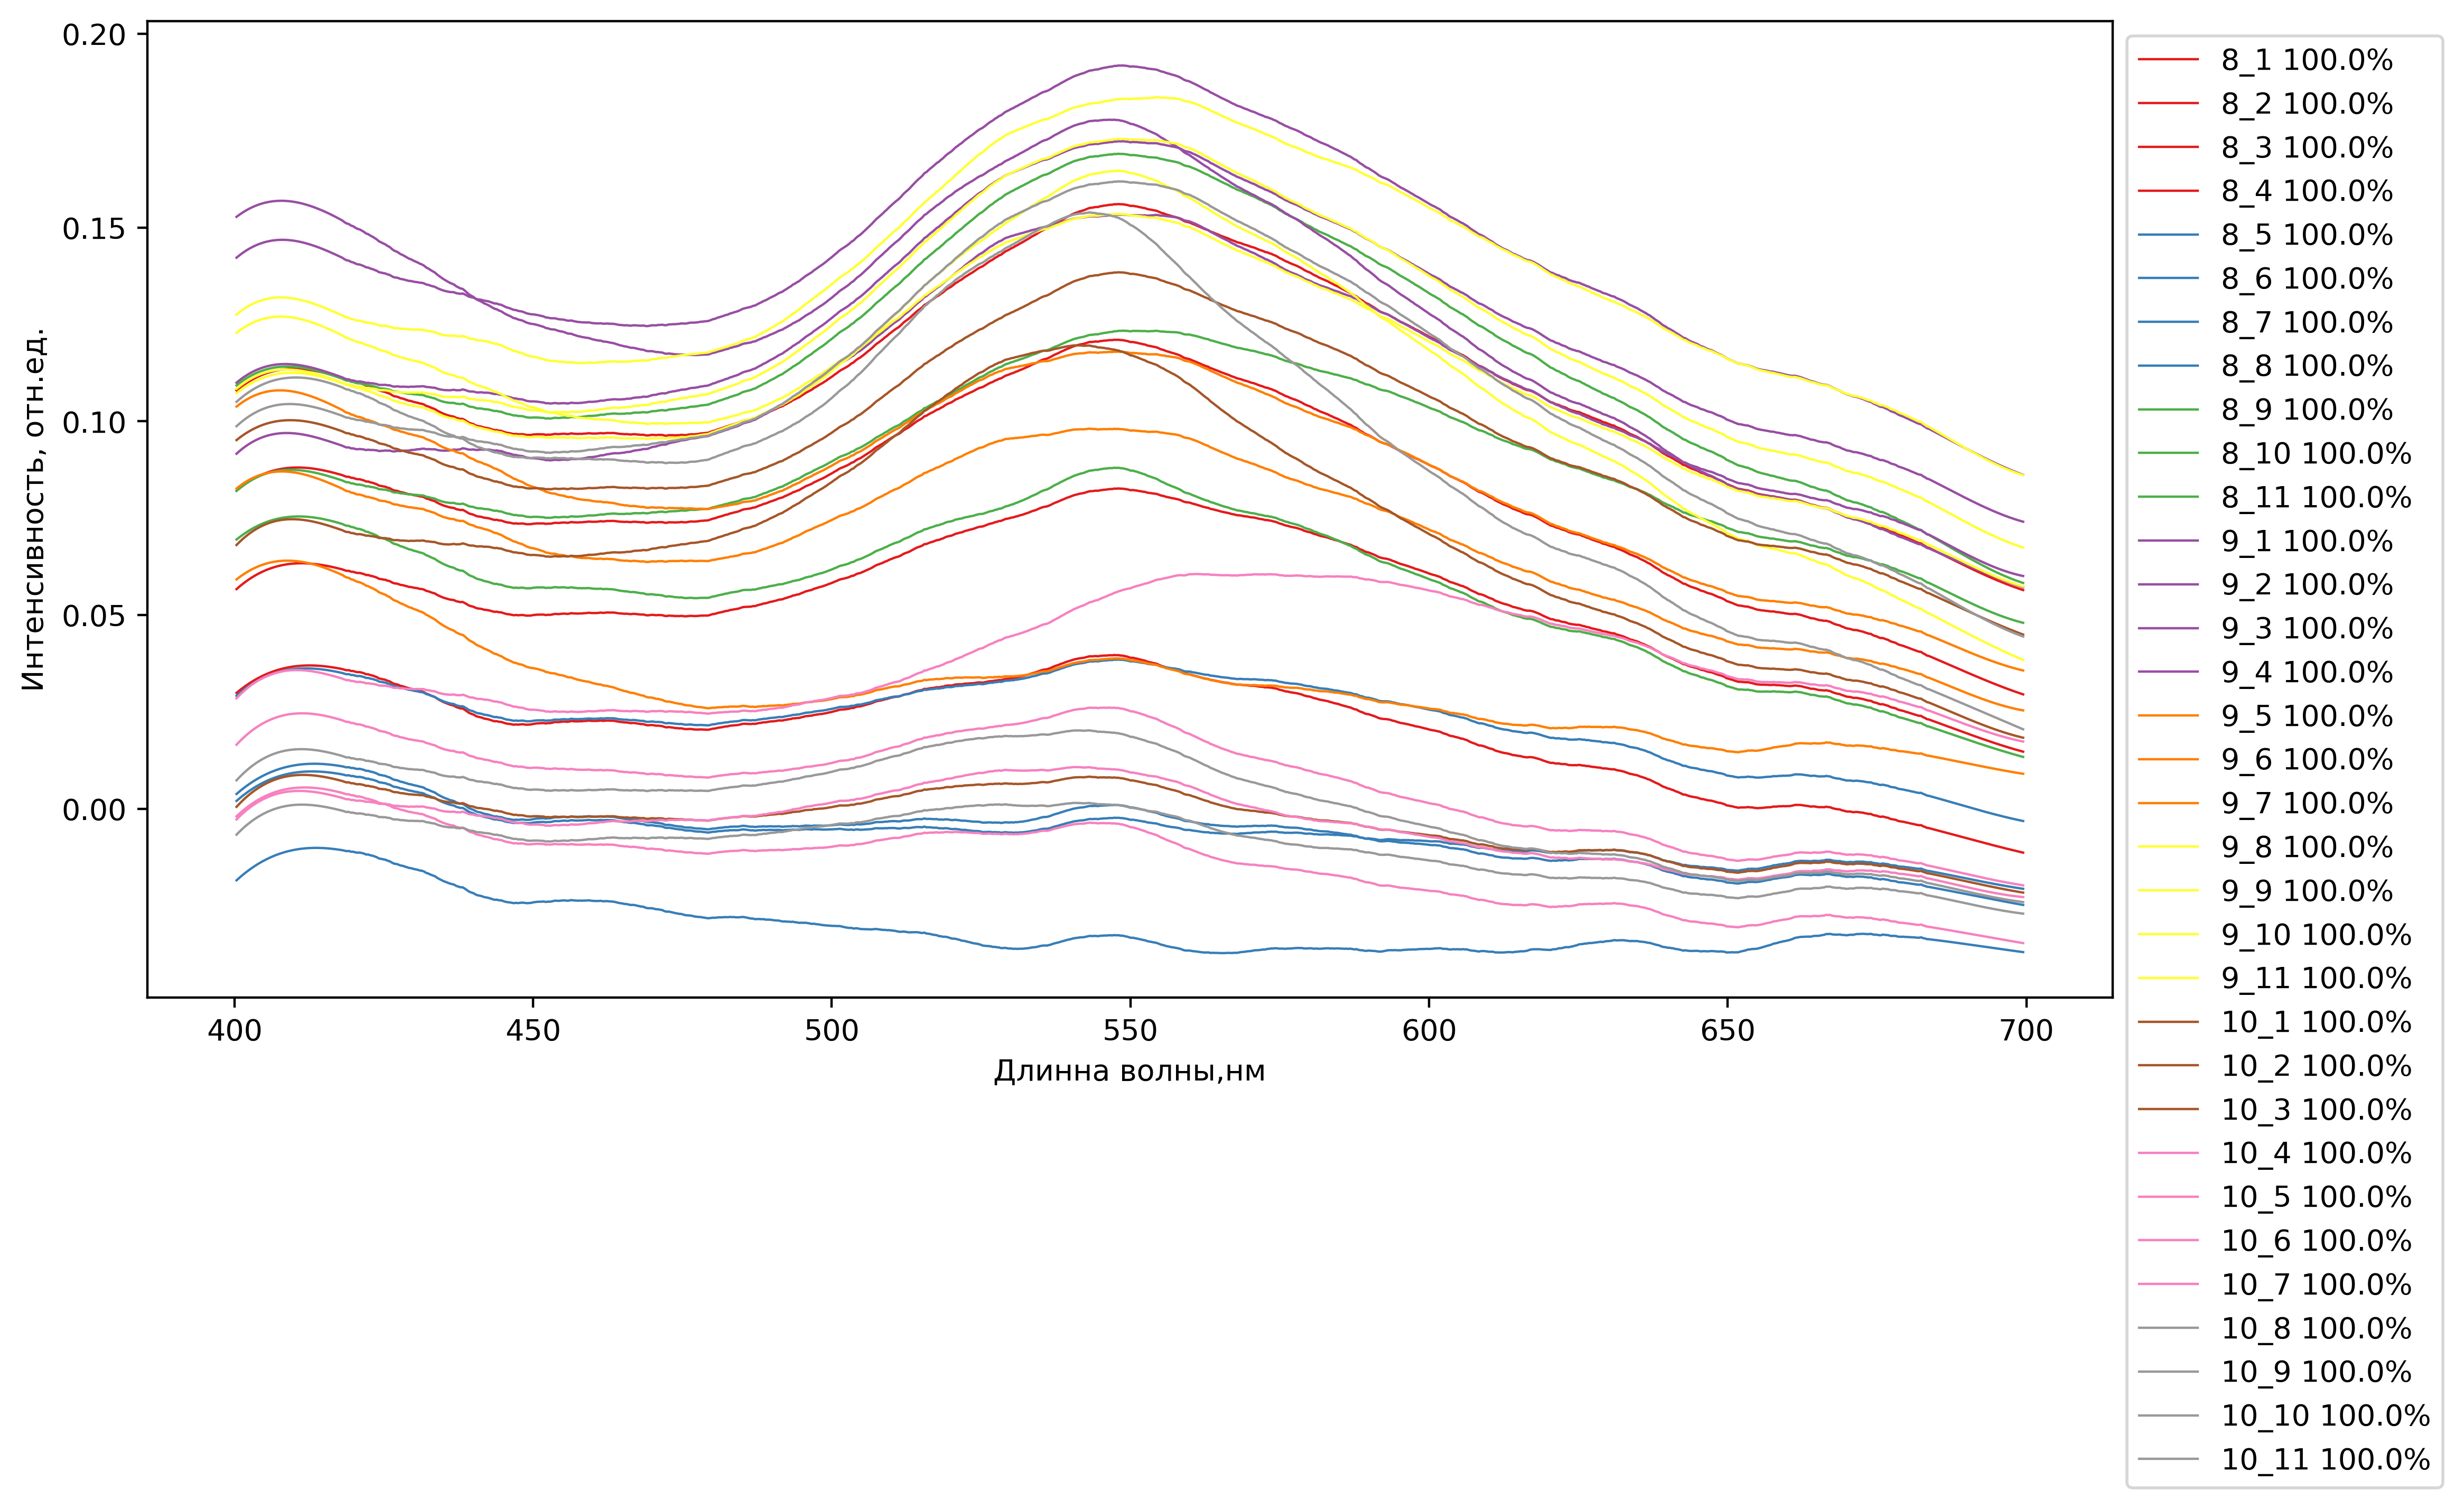

In [10]:
# построение красивых итоговых графиков
cmap = matplotlib.colormaps.get("Set1")(np.linspace(0, 1, len(spec)))
plt.figure(figsize=(12, 6), dpi=400)
k = 0
for n in range(len(spec)):
    plt.plot(
        x,
        spec[n],
        lw=0.8,
        color=cmap[n],
        label=str(folders_list[n])
        + " "
        + str(round(len(data_new[n]) * 100 / len(data[n]), 2))
        + "%",
    )
plt.xlabel("Длинна волны,нм")
plt.ylabel("Интенсивность, отн.ед.")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig("test 8,9,10.png")

In [ ]:
print(folders_list)

In [20]:
for n in range(len(spec)):
    plt.figure(figsize=(12, 8))
    plt.ioff()
    for i in range(len(data[n])):
        plt.plot(
            x,
            data[n][i],
            lw=0.05,
            alpha=0.5,
            color="black",
        )
    plt.plot(x, spec[n], color="red")
    plt.title(
        folders_list[n]
        + ", "
        + str(round(len(data_new[n]) * 100 / len(data[n]), 2))
        + "%"
    )
    #plt.ylim(0, 1.3 * np.max(spec[n]))
    plt.xlabel("Длинна волны,нм")
    plt.ylabel("Интенсивность, отн.ед.")
    plt.savefig("test/" + str(folders_list[n]) + ".png")

C:\Users\Nik\AppData\Local\Temp\ipykernel_13816\64198668.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 8))


точки с разными цветами фоном

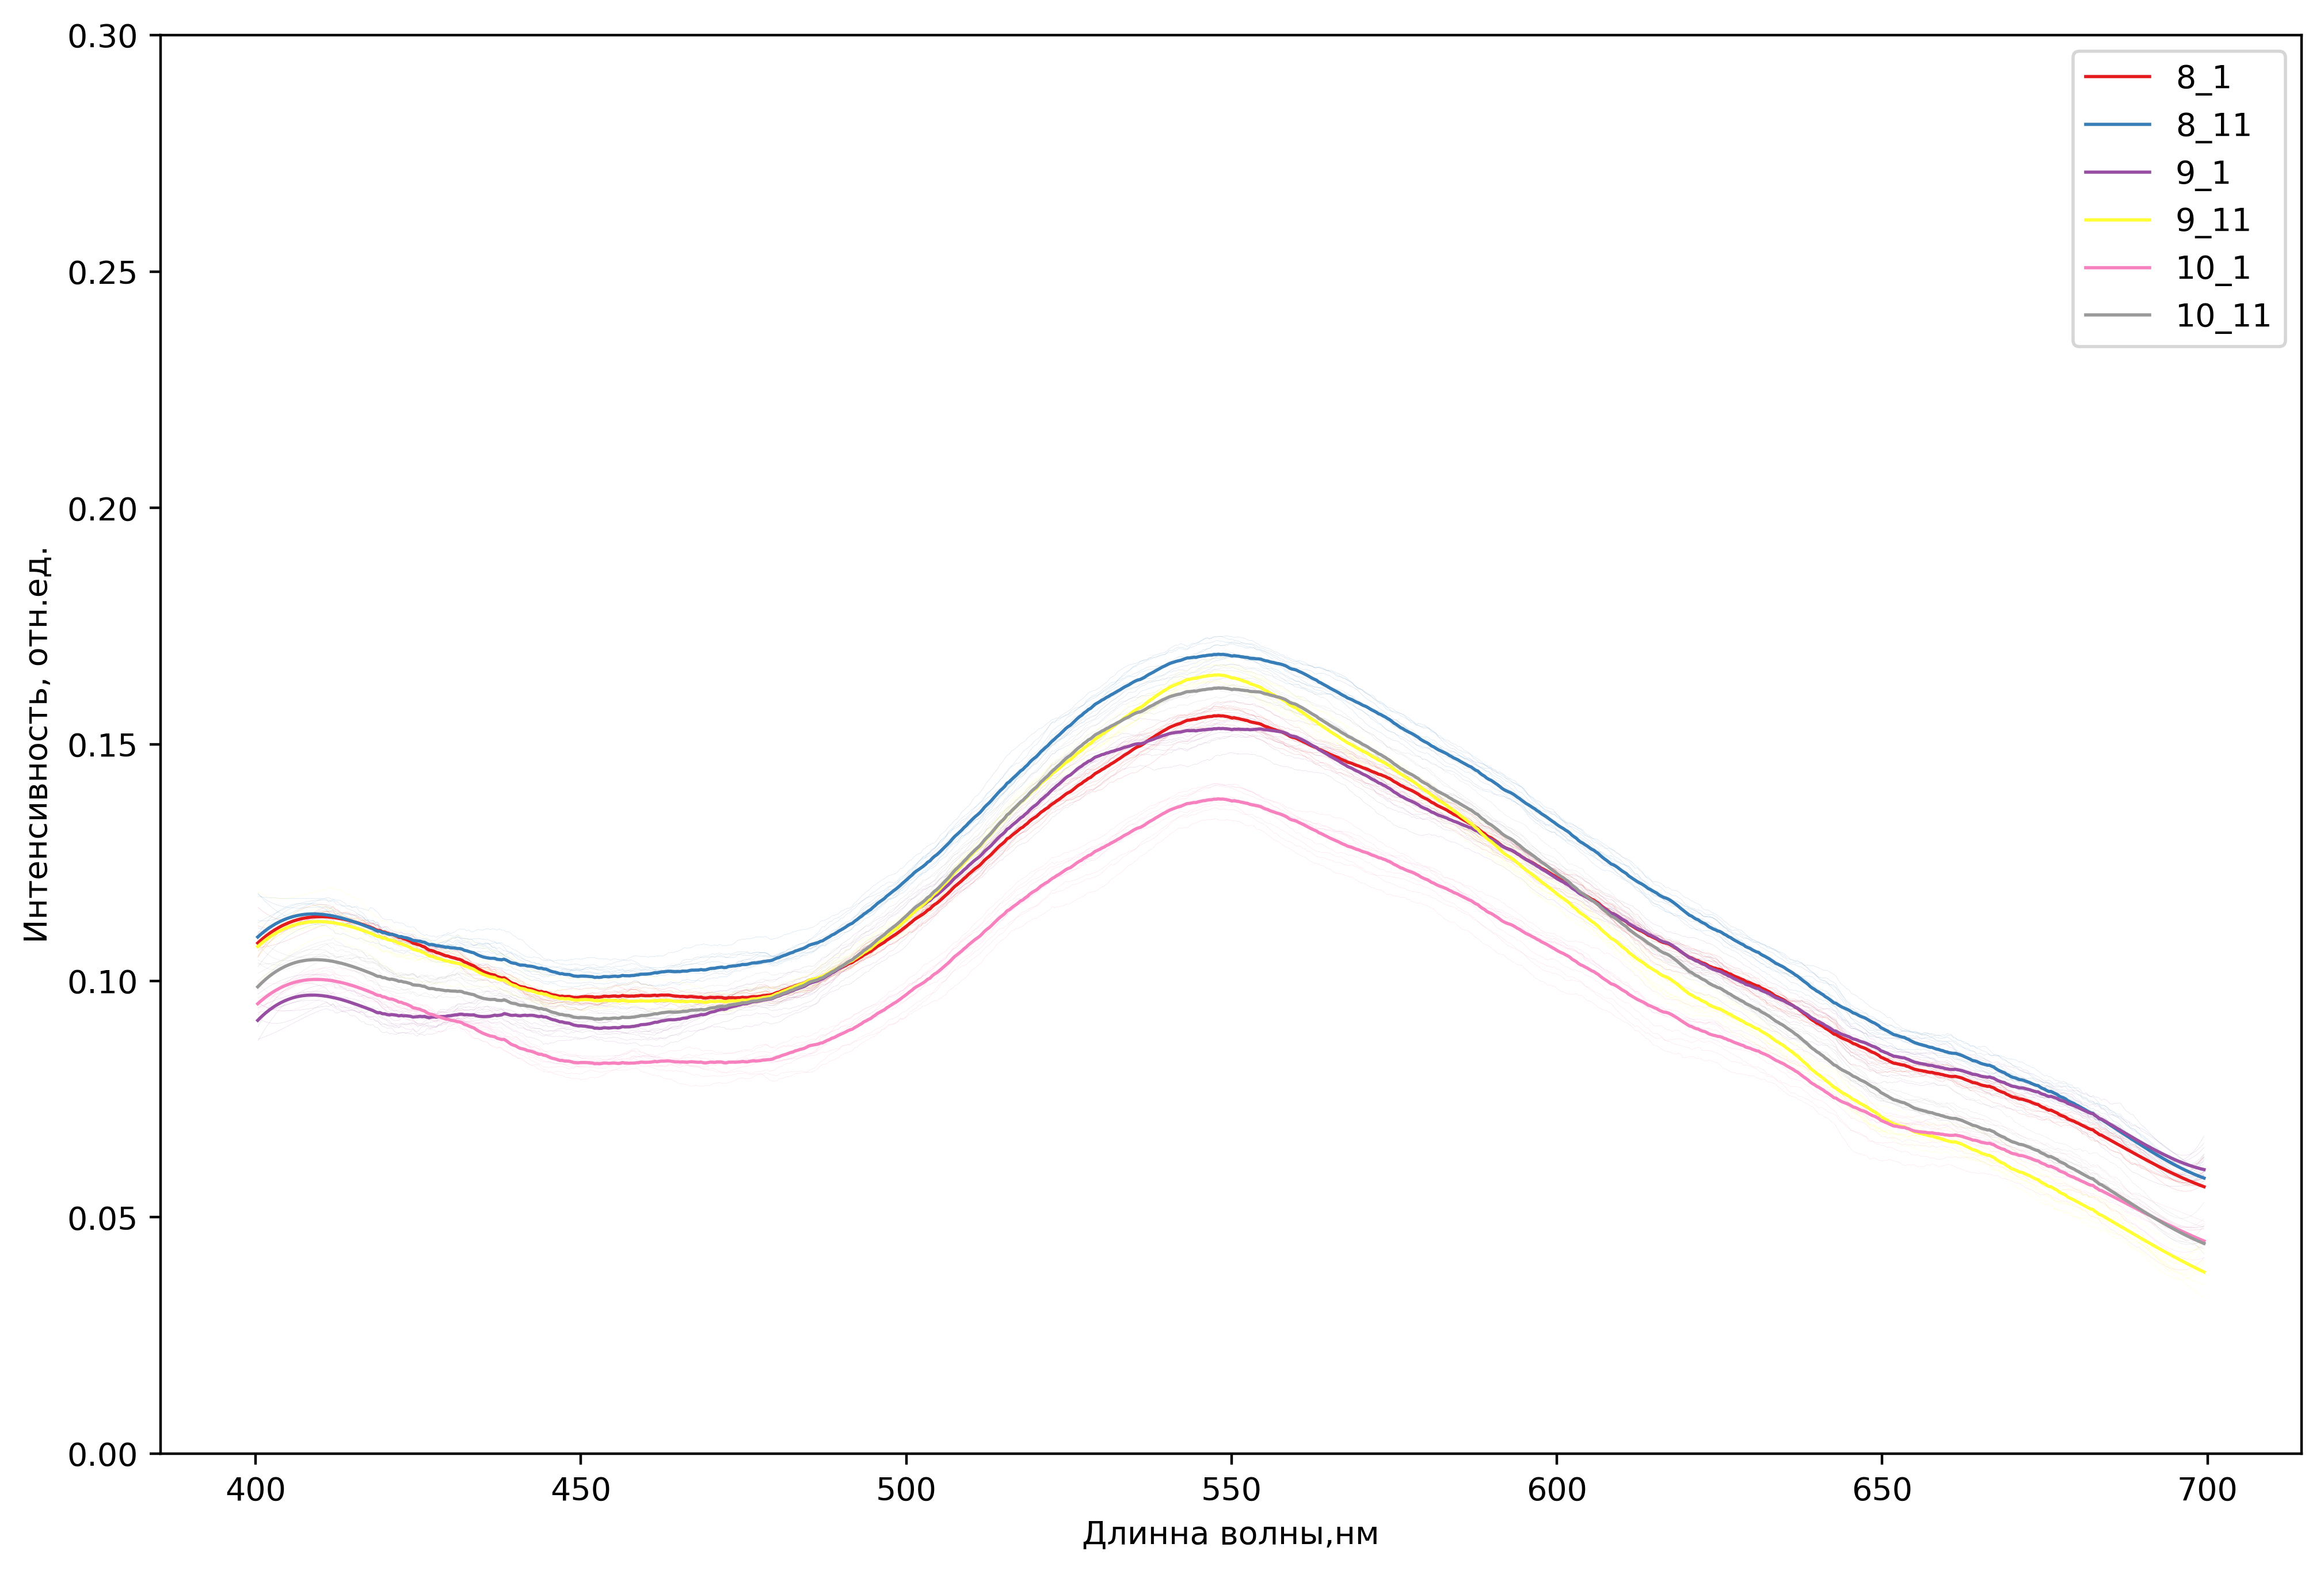

In [18]:
cmap = matplotlib.colormaps.get("Set1")(np.linspace(0, 1, 6))
plt.figure(figsize=(12, 8), dpi=400)
car = [0, 10, 11, 21, 22, 32]
a = 0
for n in car:
    for i in range(0, len(data[n]), 100):
        plt.plot(
            x,
            data[n][i],
            lw=0.05,
            alpha=0.5,
            color=cmap[a],
        )
    a += 1
a = 0
for n in car:
    plt.plot(x, spec[n], lw=1, alpha=1, color=cmap[a], label=folders_list[n])
    a += 1
plt.legend()

# plt.plot(x, spec[n], color="red")
plt.ylim(0, 0.3)
plt.xlabel("Длинна волны,нм")
plt.ylabel("Интенсивность, отн.ед.")
plt.savefig("j8910.png")

дескрипторы

In [12]:
def coef_parabola(sp):
    """коэффициенты параболы"""
    _m = np.max(sp)
    _gap = 0.005
    _i = np.argmax(sp)
    if _i == 0 or _i + 300 > len(sp):
        return [0]
    _p, _q = 0, 0
    for i in range(_i, _i + 300):
        if sp[i] < _m - _gap:
            _q = i
            break
    for i in range(_i, _i - 300, -1):
        if sp[i] < _m - _gap:
            _p = i

            break
    try:
        _coefs = np.polyfit(
            x[_p:_q], sp[_p:_q], 2
        )  # Вторым аргументом передается степень полинома
    except:
        return [0]
    return _coefs


def w_h_75(sp):
    """ширина, высота"""
    _h = np.max(sp) - (np.max(sp) - np.min(sp[0 : round(len(sp) / 3)])) * 0.25
    _start, _end = 0, 0
    _ind_max = np.argmax(sp)
    if _ind_max == 0 or _ind_max + 300 > len(sp):
        return [0, 0]
    for i in range(_ind_max, _ind_max + 300):
        if sp[i] <= _h:
            _end = i
            break
    for i in range(_ind_max, _ind_max - 300, -1):
        if sp[i] <= _h:
            _start = i
            break
    _w = x_to_nm(_end) - x_to_nm(_start)
    return (_w, _h)


def angle(sp, point):
    _x1 = x_to_nm(np.argmax(sp))
    _y1 = np.max(sp)
    _x2 = point
    _y2 = sp[nm_to_x(point)]
    return (_y2 - _y1) / (_x2 - _x1)

In [13]:
# выбор максимума
S_name = pd.Series(folders_list)
S_Imax = pd.Series(name="I(max)")
S_NMmax = pd.Series(name="I nm")
S_I650 = pd.Series(name="I(650)")
S_Imax_m_I650 = pd.Series(name="I(max)-I(650)")
S_I400 = pd.Series(name="I(400)")
S_Imax_m_I400 = pd.Series(name="I(max)-I(400)")
S_coef_a = pd.Series(name="coef A")
S_height = pd.Series(name="height")
S_weight = pd.Series(name="weight")
S_angle = pd.Series(name="ang")
_sp = nm_to_x(475)
for i in range(len(spec)):
    S_Imax.loc[i] = np.max(spec[i])
    S_NMmax.loc[i] = x[np.argmax(spec[i])]
    S_I650.loc[i] = spec[i][tail_x]
    S_Imax_m_I650.loc[i] = S_Imax.loc[i] - S_I650.loc[i]
    S_I400.loc[i] = spec[i][_sp]
    S_Imax_m_I400.loc[i] = S_Imax.loc[i] / S_I400.loc[i]
    S_coef_a.loc[i] = coef_parabola(spec[i])[0]
    _w_h = w_h_75(spec[i])
    S_height.loc[i] = _w_h[0]
    S_weight.loc[i] = _w_h[1]
    S_angle.loc[i] = angle(spec[i], 570)

In [ ]:
# построение параболы и кучи линий
n = 0


ind = x_to_nm(np.argmax(spec[n]))
max = np.max(spec[n])


mean = spec[n][nm_to_x(650)]


plt.plot((ind, ind), (0, max), color="blue")
q = 0.75


def h(_max, _650, coe):
    return _max - coe * (_max - _650)


def o(sp):
    return np.max(sp) - (np.max(sp) - np.min(sp[0 : round(len(sp) / 3)])) * 0.25


parabola = np.poly1d(coef_parabola(spec[n]))


plt.title("измерение " + str(folders_list[n]))
plt.plot((400, 600), (max * q, max * q), label="0.75*I(max")
plt.plot((400, 600), (max * 0.5, max * 0.5), label="0.5*I(max")


plt.plot(
    (400, 600),
    (h(max, mean, 0.25), h(max, mean, 0.25)),
    label="0.75*I(max) вычет I(650)",
)
plt.plot((400, 600), (o(spec[n]), o(spec[n])), label="верхняя")


plt.plot(
    (400, 600), (h(max, mean, 0.5), h(max, mean, 0.5)), label="0.5*I(max) вычет I(650)"
)


plt.plot(x[100:500], parabola(x[100:500]), label="Аппроксимация")


plt.plot(x, spec[n], color="black")


plt.ylim(mean * 0.9, max * 1.1)


plt.legend()

построение карт

In [19]:
import sys

sys.path.append(r"C:\Users\Nik\Desktop\prog")
from pyfitit import *

In [ ]:
data_measure = pd.concat(
    [
        S_Imax,
        S_NMmax,
        S_I650,
        S_Imax_m_I650,
        S_I400,
        S_Imax_m_I400,
        S_coef_a,
        S_height,
        S_weight,
        S_angle,
    ],
    axis=1,
)
data_measure.to_excel("output4.xlsx", index=False)

In [14]:
data_speed = pd.read_excel("speed test.xlsx")
data_measure = pd.concat(
    [
        S_Imax,
        S_NMmax,
        S_I650,
        S_Imax_m_I650,
        S_I400,
        S_Imax_m_I400,
        S_coef_a,
        S_height,
        S_weight,
        S_angle,
    ],
    axis=1,
)
data_table = pd.concat([data_speed, data_measure], axis=1)
print(data_table.columns[0:])

Index(['имя', 'v АК', 'v ХЗ', 'v ЦН', 'v М', 'I(max)', 'I nm', 'I(650)',
       'I(max)-I(650)', 'I(400)', 'I(max)-I(400)', 'coef A', 'height',
       'weight', 'ang'],
      dtype='object')


In [15]:
data_table.to_excel("output test.xlsx", index=False)

In [ ]:
data_table = data_table.drop(10)
print(data_table)

In [ ]:
df = pd.read_csv("params copy.csv", sep="\t")

In [17]:
df = pd.read_excel("output test cut.xlsx")

In [18]:
data_table = df
print(data_table)

      имя  v АК  v ХЗ  v ЦН  v М    I(max)     I nm    I(650)  I(max)-I(650)  \
0     8_1   1.0   1.0   1.0    0  0.156074  547.992  0.083420       0.072654   
1     8_2   1.1   0.8   1.1    0  0.121051  547.992  0.053251       0.067800   
2    8_10   1.1   0.8   1.1    0  0.123393  548.679  0.072188       0.051205   
3     9_2   0.8   1.1   1.1    0  0.172288  547.992  0.100083       0.072205   
4     9_3   0.6   1.2   1.2    0  0.191843  548.679  0.115806       0.076037   
5     9_4   0.4   1.3   1.3    0  0.177849  547.305  0.083293       0.094556   
6     9_5   0.2   1.4   1.4    0  0.117984  547.992  0.055559       0.062424   
7     9_8   0.4   1.3   1.3    0  0.153526  547.992  0.082790       0.070736   
8     9_9   0.6   1.2   1.2    0  0.183667  554.508  0.115780       0.067887   
9    9_10   0.8   1.1   1.1    0  0.172890  548.679  0.095603       0.077287   
10   10_2   1.1   1.1   0.8    0  0.119595  540.770  0.037806       0.081790   
11  10_10   1.1   1.1   0.8    0  0.1539

Try predict by: ['v АК', 'v ЦН']
I(max) - regression score: {'R2-score': 0.21551897438449552, 'MAE': 0.01722216918005758, 'MAX': 0.04770393168722413, 'RMSE': 0.02298123044818916, 'R2-score interval': array([-1.5709617 ,  0.76063024]), 'RMSE interval': array([0.01647952, 0.03793592]), 'MAE interval': array([0.00712434, 0.02732   ])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.]), 'MAE interval': array([0., 0.])}
I nm - regression score: {'R2-score': 0.2784945466805354, 'MAE': 1.8681531250000774, 'MAX': 5.897699999999986, 'RMSE': 2.666175933826872, 'R2-score interval': array([-1.3645733 ,  0.77984606]), 'RMSE interval': array([1.9118774, 4.4011503]), 'MAE interval': array([0.60578814, 3.13051811])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.]), 'MAE interval': array([0., 0.])}
I(650) - regression score: {'R2-score': 0.76430318096

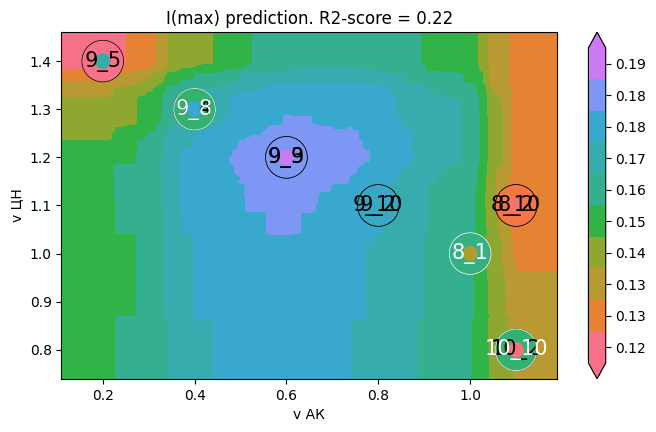

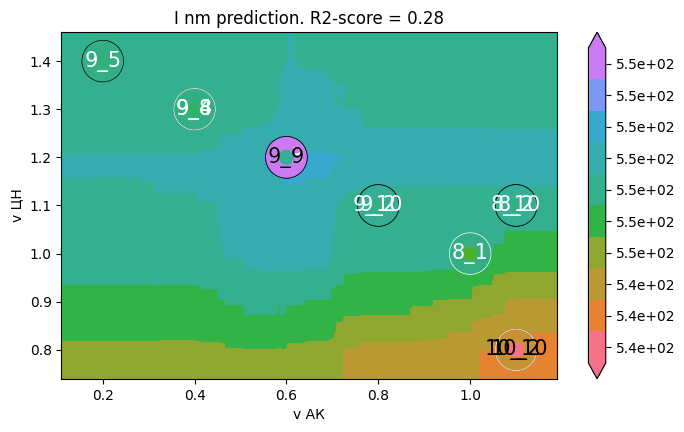

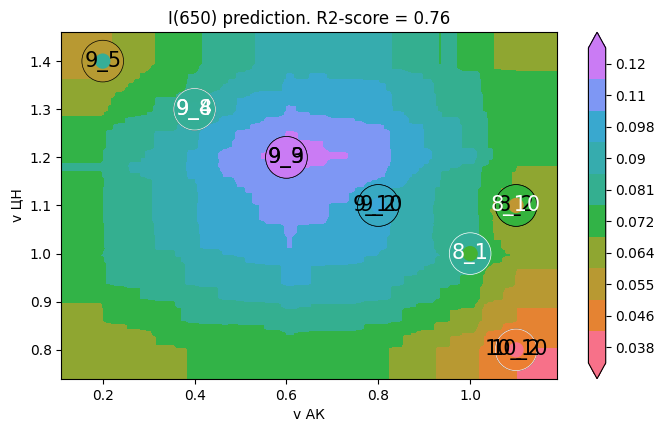

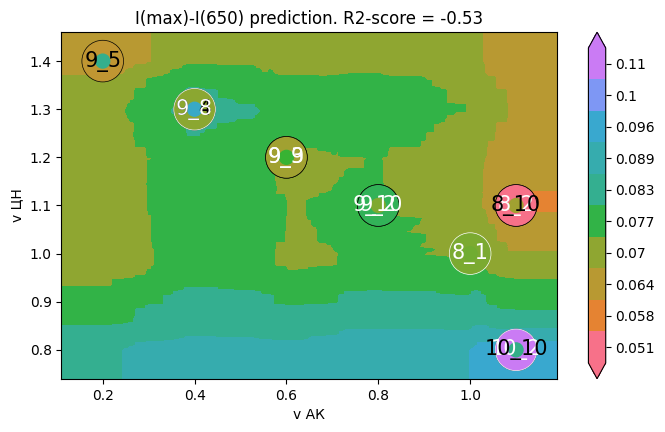

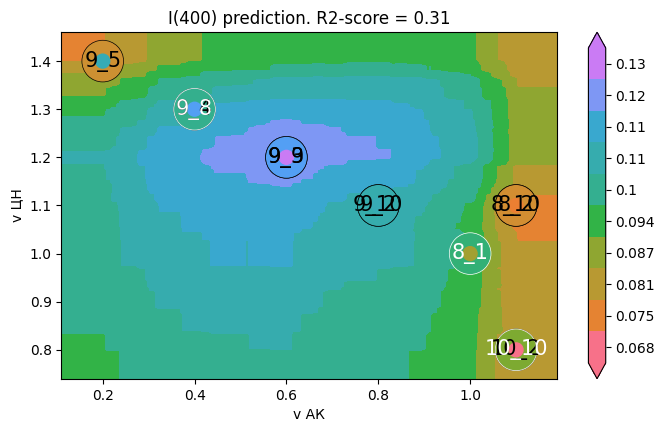

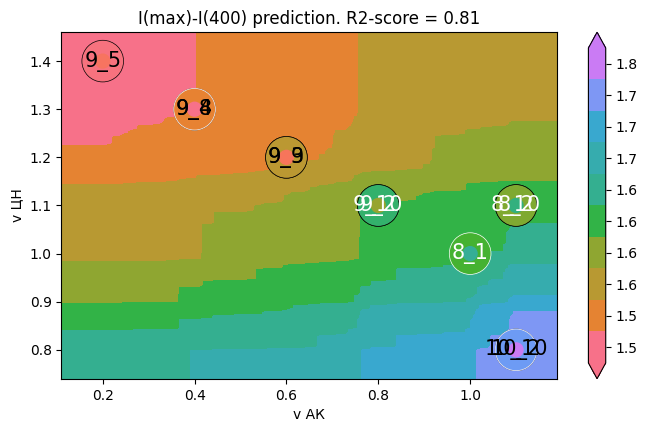

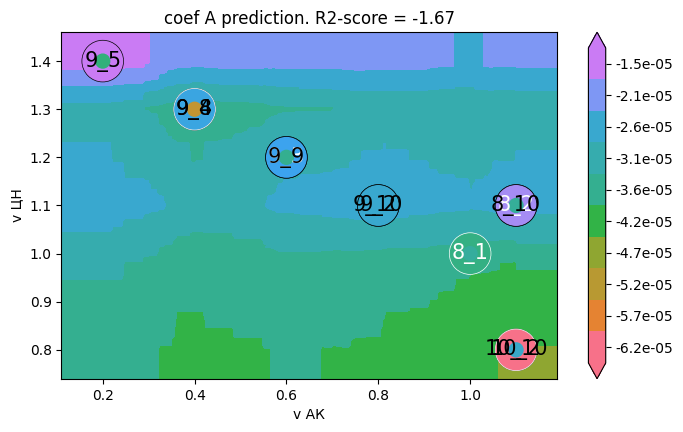

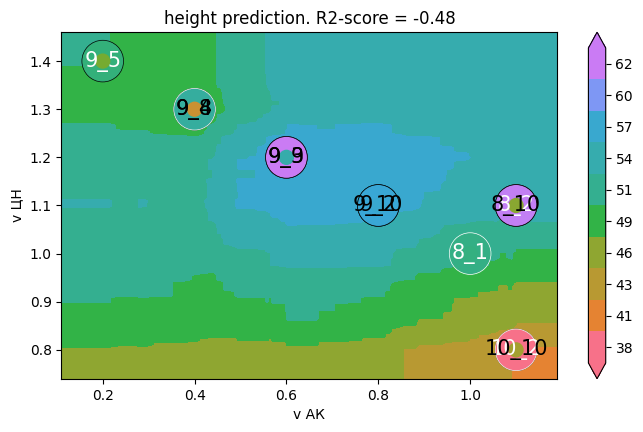

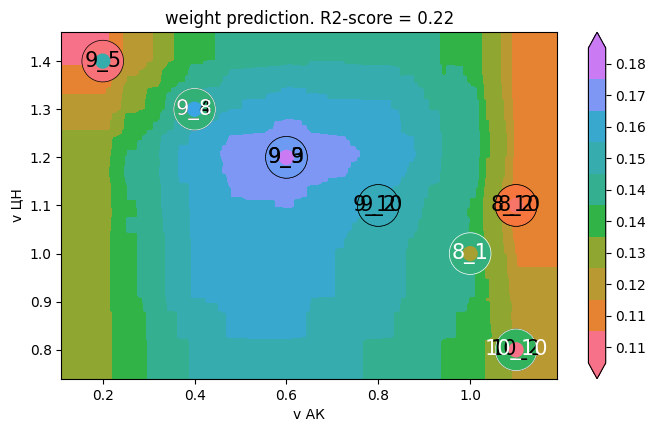

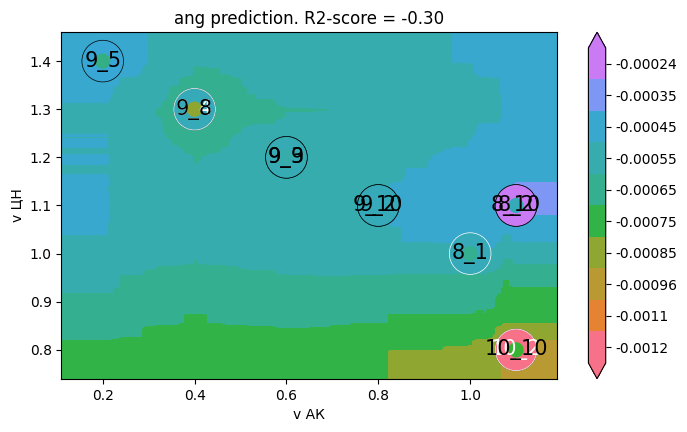

In [29]:
# 2D КАРТЫ
# import sklearn
data_table["имя"] = data_table["имя"].astype(str)
plotDescriptors2d(
    data_table,
    descriptorNames=["v АК", "v ЦН"],
    # labelNames=data_table.columns[5:],
    labelNames=[
        "I(max)",
        "I nm",
        "I(650)",
        "I(max)-I(650)",
        "I(400)",
        "I(max)-I(400)",
        "coef A",
        "height",
        "weight",
        "ang",
    ],
    textColumn=data_table.columns[0],
    cv_count=len(data_table),
    # unknown="unknown.params",
    folder_prefix="results/des",
    # model_regr=sklearn.linear_model.RidgeCV(),
)

In [33]:
print(len(spec.pop(len(data_table))))

875


In [35]:
sample = Sample(params=data_table, spectra=spec[0:len(data_table)], energy=x, meta=dict(nameColumn="имя"))
sample.saveToFolder("sample")

In [36]:
#data_table["имя"] = data_table["имя"].astype(str)
#sample = Sample(params=data_table, spectra=spec.pop(len(data_table)), energy=x, meta=dict(nameColumn="имя"))

# sample.saveToFolder("sample")
descriptor.plot_cv_result(
    sample,
    #textColumn=data_table.columns[0],
    features=["v АК","v ХЗ", "v ЦН"],
    label_names=[
        "I(max)",
        "I nm",
        "I(650)",
        "I(max)-I(650)",
        "I(400)",
        "I(max)-I(400)",
        "coef A",
        "height",
        "weight",
        "ang",
    ],
    folder="results/1",
    cv_count=len(data_table),
    # repForStdCalc=1,
)

Try predict by: ['v АК', 'v ХЗ', 'v ЦН']
I(max) - regression score: {'R2-score': 0.2559139716548655, 'MAE': 0.016201076907899115, 'MAX': 0.04770393168722413, 'RMSE': 0.022381728890242987, 'R2-score interval': array([-1.4385761 ,  0.77295602]), 'RMSE interval': array([0.01604962, 0.03694631]), 'MAE interval': array([0.00595318, 0.02644898])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.]), 'MAE interval': array([0., 0.])}
I nm - regression score: {'R2-score': 0.2703446357399467, 'MAE': 1.9036125000000748, 'MAX': 5.8461750000000166, 'RMSE': 2.681191814228876, 'R2-score interval': array([-1.39128281,  0.77735927]), 'RMSE interval': array([1.92264507, 4.42593754]), 'MAE interval': array([0.65060543, 3.15661957])}+-{'R2-score': 0.0, 'MAE': 0.0, 'MAX': 0.0, 'RMSE': 0.0, 'R2-score interval': array([0., 0.]), 'RMSE interval': array([0., 0.]), 'MAE interval': array([0., 0.])}
I(650) - regression score: {'R2-score': 0

In [26]:
print(data_table)

      имя  v АК  v ХЗ  v ЦН  v М    I(max)     I nm    I(650)  I(max)-I(650)  \
0     8_1   1.0   1.0   1.0    0  0.156074  547.992  0.083420       0.072654   
1     8_2   1.1   0.8   1.1    0  0.121051  547.992  0.053251       0.067800   
2    8_10   1.1   0.8   1.1    0  0.123393  548.679  0.072188       0.051205   
3     9_2   0.8   1.1   1.1    0  0.172288  547.992  0.100083       0.072205   
4     9_3   0.6   1.2   1.2    0  0.191843  548.679  0.115806       0.076037   
5     9_4   0.4   1.3   1.3    0  0.177849  547.305  0.083293       0.094556   
6     9_5   0.2   1.4   1.4    0  0.117984  547.992  0.055559       0.062424   
7     9_8   0.4   1.3   1.3    0  0.153526  547.992  0.082790       0.070736   
8     9_9   0.6   1.2   1.2    0  0.183667  554.508  0.115780       0.067887   
9    9_10   0.8   1.1   1.1    0  0.172890  548.679  0.095603       0.077287   
10   10_2   1.1   1.1   0.8    0  0.119595  540.770  0.037806       0.081790   
11  10_10   1.1   1.1   0.8    0  0.1539